**1st milestone notebook** \\
Students:
*   Alexandre Bernard--Michinov, s212815
*   Henan Zhao, s202848
*   Mehmet Eyyupoglu, s174448

The aim of the project is to predict game outcomes for the 2018-2019 english football league.

Ideas: \\
 Predict final number of points \\
 contribution of each player in the team success \\
 clustering player that plays good together





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pystan

Importing team data and filtering on the correct league

In [3]:
teams = pd.read_json('https://gitlab.gbar.dtu.dk/s212815/model-basedML/raw/master/data/teams.json')
teams['league'] = [item['name'] for item in teams['area']]
teams = teams[teams['league'] == 'England']
teams = teams[teams['type'] == 'club']
teams

city                    name  wyId  \
0            Newcastle upon Tyne        Newcastle United  1613   
8   Huddersfield, West Yorkshire       Huddersfield Town  1673   
26           Bournemouth, Dorset         AFC Bournemouth  1659   
27         Brighton, East Sussex  Brighton & Hove Albion  1651   
39           Burnley, Lancashire                 Burnley  1646   
54                     Leicester          Leicester City  1631   
55                        London         West Ham United  1633   
56                Stoke-on-Trent              Stoke City  1639   
60                       Watford                 Watford  1644   
65                     Liverpool                 Everton  1623   
66                 West Bromwich    West Bromwich Albion  1627   
67                    Manchester         Manchester City  1625   
68                        London       Tottenham Hotspur  1624   
70                        London          Crystal Palace  1628   
75        Southampton, Hampshire             Southampton  1619   
77                     Liverpool               Liverpool  1612   
78                        London                 Chelsea  1610   
79                    Manchester       Manchester United  1611   
84                        London                 Arsenal  1609   

                 officialName  \
0         Newcastle United FC   
8        Huddersfield Town FC   
26            AFC Bournemouth   
27  Brighton & Hove Albion FC   
39                 Burnley FC   
54          Leicester City FC   
55         West Ham United FC   
56              Stoke City FC   
60                 Watford FC   
65                 Everton FC   
66    West Bromwich Albion FC   
67         Manchester City FC   
68       Tottenham Hotspur FC   
70          Crystal Palace FC   
75             Southampton FC   
77               Liverpool FC   
78                 Chelsea FC   
79       Manchester United FC   
84                 Arsenal FC   

                                                 area  type   league  
0   {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
8   {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
26  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
27  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
39  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
54  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
55  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
56  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
60  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
65  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
66  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
67  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
68  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
70  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
75  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
77  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
78  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
79  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England  
84  {'name': 'England', 'id': '0', 'alpha3code': '...  club  England

Importing players data

In [4]:
players = pd.read_json("https://gitlab.gbar.dtu.dk/s212815/model-basedML/raw/master/data/players.json")
players = players[players['currentTeamId'].isin(teams['wyId'])]
players['birthDate'] = pd.to_datetime(players['birthDate'])
players['age'] = round((datetime(2019,5,1) - players['birthDate']).dt.days/365.25)
print(f"Number of players : {players.shape[0]}")
players.head()

Number of players : 425


passportArea  weight   firstName  \
6   {'name': 'Belgium', 'id': '56', 'alpha3code': ...      91        Toby   
7   {'name': 'Belgium', 'id': '56', 'alpha3code': ...      88         Jan   
9   {'name': 'Denmark', 'id': '208', 'alpha3code':...      76  Christian    
15  {'name': 'Iceland', 'id': '352', 'alpha3code':...      77     Johann    
35  {'name': 'Morocco', 'id': '504', 'alpha3code':...      80       Nacer   

   middleName                     lastName currentTeamId  birthDate  height  \
6                             Alderweireld          1624 1989-03-02     187   
7                               Vertonghen          1624 1987-04-24     189   
9                        Dannemann Eriksen          1624 1992-02-14     180   
15             Berg Gu\u00f0munds\u00adson          1646 1990-10-27     186   
35                                  Chadli          1627 1989-08-02     187   

                                                 role  \
6   {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
7   {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
9   {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
15  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
35  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   

                                            birthArea  wyId   foot  \
6   {'name': 'Belgium', 'id': '56', 'alpha3code': ...    36  right   
7   {'name': 'Belgium', 'id': '56', 'alpha3code': ...    48   left   
9   {'name': 'Denmark', 'id': '208', 'alpha3code':...    54  right   
15  {'name': 'Iceland', 'id': '352', 'alpha3code':...    93   left   
35  {'name': 'Belgium', 'id': '56', 'alpha3code': ...   261  right   

                    shortName currentNationalTeamId   age  
6             T. Alderweireld                  5629  30.0  
7               J. Vertonghen                  5629  32.0  
9                  C. Eriksen                  7712  27.0  
15  J. Gu\u00f0munds\u00adson                  7839  29.0  
35                  N. Chadli                  5629  30.0

In [5]:
# Adding the average rank and the position of the player on the season (ASSUMPTION: we know the average level of the player)

playerank = pd.read_json("https://gitlab.gbar.dtu.dk/s212815/model-basedML/raw/master/data/playerank.json")
print(f"Number of players : {playerank.shape[0]}")
playerank_data = playerank.groupby('playerId').first()['roleCluster']
playerank_data['playerScore'] = playerank.groupby('playerId').mean()['playerankScore']
players = players.merge(playerank_data, left_on="wyId", right_on='playerId')

Number of players : 46897


Importing games

In [6]:
matches = pd.read_json("https://gitlab.gbar.dtu.dk/s212815/model-basedML/raw/master/data/matches_England.json")
matches = matches.drop(['venue', 'date', 'referees', 'competitionId', 'seasonId', 'duration'], axis=1)
matches['team1'] = [list(item.keys())[0] for item in matches['teamsData']]
matches['team2'] = [list(item.keys())[1] for item in matches['teamsData']]
print(f"Number of matches : {matches.shape[0]}")

Number of matches : 380


For one team, extract all its game on the season and compute metrics

In [7]:
# Let's filter on one team
team = '1625'
team_season = pd.concat([matches[matches['team1'] == team],  matches[matches['team2'] == team]]).sort_values(by='gameweek')
team_season['opposite_team'] = [team_season['team1'][i] if team_season['team1'][i] != team else team_season['team2'][i] for i in team_season.index]
team_season['#goals'] = [item[team]['score'] for item in team_season['teamsData']]
team_season['#cumulative_goals'] = np.cumsum(np.array(team_season['#goals']))
team_season['#conceded_goals'] = [team_season['teamsData'][i][team_season['opposite_team'][i]]['score'] for i in team_season.index]
team_season['#cummulative_conceded_goals'] = np.cumsum(np.array(team_season['#conceded_goals']))
team_season['#points'] = (team_season['winner'] == int(team)).astype(int) * 3 + (team_season['winner'] == 0).astype(int)
team_season['#cumulative_points'] = np.cumsum(np.array(team_season['#points']))
players = players[players['currentTeamId'] == int(team)]
team_season

status  roundId  gameweek  \
372  Played  4405654         1   
360  Played  4405654         2   
359  Played  4405654         3   
349  Played  4405654         4   
336  Played  4405654         5   
325  Played  4405654         6   
313  Played  4405654         7   
306  Played  4405654         8   
294  Played  4405654         9   
288  Played  4405654        10   
272  Played  4405654        11   
266  Played  4405654        12   
250  Played  4405654        13   
241  Played  4405654        14   
230  Played  4405654        15   
220  Played  4405654        16   
214  Played  4405654        17   
203  Played  4405654        18   
193  Played  4405654        19   
181  Played  4405654        20   
172  Played  4405654        21   
164  Played  4405654        22   
151  Played  4405654        23   
142  Played  4405654        24   
130  Played  4405654        25   
129  Played  4405654        26   
114  Played  4405654        27   
100  Played  4405654        28   
91   Played  4405654        29   
80   Played  4405654        30   
11   Played  4405654        31   
68   Played  4405654        32   
58   Played  4405654        33   
49   Played  4405654        34   
37   Played  4405654        35   
28   Played  4405654        36   
18   Played  4405654        37   
6    Played  4405654        38   

                                             teamsData              dateutc  \
372  {'1651': {'scoreET': 0, 'coachId': 8093, 'side...  2017-08-12 16:30:00   
360  {'1623': {'scoreET': 0, 'coachId': 268779, 'si...  2017-08-21 19:00:00   
359  {'1659': {'scoreET': 0, 'coachId': 8934, 'side...  2017-08-26 11:30:00   
349  {'1612': {'scoreET': 0, 'coachId': 14791, 'sid...  2017-09-09 11:30:00   
336  {'1644': {'scoreET': 0, 'coachId': 71037, 'sid...  2017-09-16 14:00:00   
325  {'1628': {'scoreET': 0, 'coachId': 8357, 'side...  2017-09-23 14:00:00   
313  {'1610': {'scoreET': 0, 'coachId': 272869, 'si...  2017-09-30 16:30:00   
306  {'1639': {'scoreET': 0, 'coachId': 9054, 'side...  2017-10-14 14:00:00   
294  {'1646': {'scoreET': 0, 'coachId': 8880, 'side...  2017-10-21 14:00:00   
288  {'1627': {'scoreET': 0, 'coachId': 149026, 'si...  2017-10-28 14:00:00   
272  {'1609': {'scoreET': 0, 'coachId': 7845, 'side...  2017-11-05 14:15:00   
266  {'1631': {'scoreET': 0, 'coachId': 209010, 'si...  2017-11-18 15:00:00   
250  {'1625': {'scoreET': 0, 'coachId': 267136, 'si...  2017-11-26 16:00:00   
241  {'1625': {'scoreET': 0, 'coachId': 267136, 'si...  2017-11-29 20:00:00   
230  {'1633': {'scoreET': 0, 'coachId': 8235, 'side...  2017-12-03 16:00:00   
220  {'1625': {'scoreET': 0, 'coachId': 267136, 'si...  2017-12-10 16:30:00   
214  {'10531': {'scoreET': 0, 'coachId': 381291, 's...  2017-12-13 19:45:00   
203  {'1625': {'scoreET': 0, 'coachId': 267136, 'si...  2017-12-16 17:30:00   
193  {'1659': {'scoreET': 0, 'coachId': 8934, 'side...  2017-12-23 15:00:00   
181  {'1613': {'scoreET': 0, 'coachId': 210700, 'si...  2017-12-27 19:45:00   
172  {'1628': {'scoreET': 0, 'coachId': 8357, 'side...  2017-12-31 12:00:00   
164  {'1644': {'scoreET': 0, 'coachId': 71037, 'sid...  2018-01-02 20:00:00   
151  {'1612': {'scoreET': 0, 'coachId': 14791, 'sid...  2018-01-14 16:00:00   
142  {'1613': {'scoreET': 0, 'coachId': 0, 'side': ...  2018-01-20 17:30:00   
130  {'1627': {'scoreET': 0, 'coachId': 7973, 'side...  2018-01-31 20:00:00   
129  {'1646': {'scoreET': 0, 'coachId': 8880, 'side...  2018-02-03 12:30:00   
114  {'1631': {'scoreET': 0, 'coachId': 209010, 'si...  2018-02-10 17:30:00   
100  {'1609': {'scoreET': 0, 'coachId': 7845, 'side...  2018-03-01 19:45:00   
91   {'1625': {'scoreET': 0, 'coachId': 267136, 'si...  2018-03-04 16:00:00   
80   {'1639': {'scoreET': 0, 'coachId': 8329, 'side...  2018-03-12 20:00:00   
11   {'1651': {'scoreET': 0, 'coachId': 8093, 'side...  2018-05-09 19:00:00   
68   {'1623': {'scoreET': 0, 'coachId': 8541, 'side...  2018-03-31 16:30:00   
58   {'1625': {'scoreET': 0, 'coachId': 267136, 'si...  2018-04-07 16:3

Computing some metrics for the player in the studied team

In [8]:
playerank = playerank[playerank['matchId'].isin(set(team_season['wyId']))]
playerank = playerank.merge(team_season[['wyId', 'gameweek']], left_on='matchId', right_on='wyId').drop('wyId', axis=1)
playerank

goalScored  playerankScore  matchId  playerId          roleCluster  \
0             0         -0.0073  2499972     10108             right CB   
1             0          0.0100  2499972    105339           central MF   
2             0          0.0093  2499972     11066              left FW   
3             0          0.0070  2499972     14808           central FW   
4             0          0.0563  2499972    265673             right FW   
..          ...             ...      ...       ...                  ...   
898           0          0.0409  2500065      8324           central MF   
899           0          0.0080  2500065      8336             right MF   
900           0          0.0538  2500065      8464              left MF   
901           0         -0.0040  2500065      8498             right CB   
902           0         -0.0036  2500065      8976  central MF-right CB   

     minutesPlayed  gameweek  
0               90        26  
1               90        26  
2               73        26  
3               90        26  
4               90        26  
..             ...       ...  
898             25        35  
899             90        35  
900             75        35  
901             90        35  
902             90        35  

[903 rows x 7 columns]

In [9]:
# ## Filtering on players in the team, Gathering players data from each match and aggregate them
# players = players[players['currentTeamId'] == int(team)]

# _players = pd.DataFrame()
# for game in team_season.index:
#   for item in team_season['teamsData'][game][team]['formation']['lineup']:
#     for column in list(item.keys())[1:]:
#       if item[column] == 'null':
#         item[column] = 0
#       else:
#         if column in ['redCards', 'yellowCards']:
#           if int(item[column]) == 0:
#             item[column] = 0
#           else:
#             item[column] = int(int(item[column])/int(item[column]))
#         else:
#           item[column] = int(item[column])
#     _players = pd.concat([_players, pd.DataFrame([item])], axis=0)
# players_data = _players.groupby('playerId').sum()
# players_data['ownGoals'] = _players.groupby('playerId').max()['ownGoals']
# players_data['#played'] = _players.groupby('playerId').count()['ownGoals']
# players_data.sort_values(by='ownGoals', ascending=False).head()
# players = players.merge(players_data, how='left', left_on='wyId', right_on='playerId')
# players = players[players['#played'].notnull()]


In [10]:
pivot_playerank = playerank.pivot(index='playerId', columns='gameweek', values='playerankScore')
## Cumulative average score of the player
pivot_playerank_cumavg = pivot_playerank.cumsum(axis=1)/pivot_playerank.columns
pivot_playerank

gameweek  1       2   3       4   5   6   7       8       9   10  ...  29  30  \
playerId                                                          ...           
48       NaN     NaN NaN     NaN NaN NaN NaN     NaN     NaN NaN  ... NaN NaN   
54       NaN     NaN NaN     NaN NaN NaN NaN     NaN     NaN NaN  ... NaN NaN   
56       NaN -0.0001 NaN     NaN NaN NaN NaN     NaN     NaN NaN  ... NaN NaN   
74       NaN     NaN NaN  0.0072 NaN NaN NaN     NaN     NaN NaN  ... NaN NaN   
93       NaN     NaN NaN     NaN NaN NaN NaN     NaN  0.0026 NaN  ... NaN NaN   
...       ..     ...  ..     ...  ..  ..  ..     ...     ...  ..  ...  ..  ..   
415747   NaN     NaN NaN     NaN NaN NaN NaN     NaN     NaN NaN  ... NaN NaN   
434159   NaN     NaN NaN     NaN NaN NaN NaN     NaN     NaN NaN  ... NaN NaN   
447205   NaN     NaN NaN     NaN NaN NaN NaN     NaN     NaN NaN  ... NaN NaN   
447379   NaN     NaN NaN     NaN NaN NaN NaN     NaN     NaN NaN  ... NaN NaN   
447812   NaN     NaN NaN     NaN NaN NaN NaN -0.0043     NaN NaN  ... NaN NaN   

gameweek  31      32  33      34      35  36  37     38  
playerId                                                 
48       NaN     NaN NaN  0.0180     NaN NaN NaN    NaN  
54       NaN     NaN NaN -0.0052     NaN NaN NaN    NaN  
56       NaN     NaN NaN     NaN     NaN NaN NaN    NaN  
74       NaN     NaN NaN     NaN     NaN NaN NaN    NaN  
93       NaN     NaN NaN     NaN     NaN NaN NaN    NaN  
...       ..     ...  ..     ...     ...  ..  ..    ...  
415747   NaN     NaN NaN     NaN     NaN NaN NaN    NaN  
434159   NaN     NaN NaN     NaN     NaN NaN NaN    NaN  
447205   NaN     NaN NaN     NaN  0.0029 NaN NaN  0.001  
447379   NaN  0.0022 NaN     NaN     NaN NaN NaN    NaN  
447812   NaN     NaN NaN     NaN     NaN NaN NaN    NaN  

[324 rows x 38 columns]

In [11]:
# test = pivot_playerank.shift(periods=1, axis=1)
# pd.DataFrame(test).rolling(5).mean()

In [12]:
## Improvement TODO: take moving average instead of mean

X_team = (pivot_playerank.shift(periods=1, axis=1).cumsum(axis=1)/(pivot_playerank.columns-1)).fillna(0)

In [13]:
X_inputs = X_team[X_team.index.isin(set(players['wyId']))]
X_inputs

gameweek   1       2        3         4         5        6         7   \
playerId                                                                
8277      0.0  0.0130 -0.00245  0.000000  0.010875  0.01314  0.009217   
8307      0.0  0.0083  0.00865  0.008767  0.000000  0.00000  0.000000   
8317      0.0  0.0501  0.02750  0.034067  0.029875  0.04786  0.045167   
8325      0.0  0.0113  0.00950  0.009167  0.028300  0.04524  0.050833   
8464      0.0  0.0000  0.00000  0.000000  0.000000  0.00000  0.003150   
9380      0.0  0.0135  0.00820  0.000000  0.011700  0.01180  0.011817   
11066     0.0 -0.0067  0.00185 -0.008800  0.000000 -0.00372  0.003733   
14808     0.0  0.0000  0.00000  0.000000  0.000000  0.00054  0.000000   
26136     0.0  0.0000  0.00000 -0.008767  0.003450  0.00260  0.000683   
26150     0.0  0.0000  0.00000  0.000000  0.000000  0.00000  0.000000   
38021     0.0  0.0155  0.00245  0.002933  0.022900  0.02132  0.018383   
70083     0.0 -0.0029  0.00400  0.021000  0.017675  0.00000  0.010517   
70085     0.0  0.0000  0.00000  0.000000  0.001375  0.00000  0.000000   
70086     0.0  0.0154  0.02635  0.022667  0.017600  0.01934  0.017550   
105339    0.0  0.0137  0.01210  0.022067  0.020775  0.02210  0.031067   
134502    0.0  0.0000  0.00000  0.000000  0.000000  0.00000  0.000000   
241564    0.0  0.0000  0.00000  0.000000  0.000000  0.00000  0.000000   
245364    0.0 -0.0005 -0.00450  0.000000  0.004150  0.00386  0.019417   
265673    0.0 -0.0014  0.00140  0.008500  0.000000  0.00604  0.004833   
340386    0.0  0.0016  0.00755  0.009833  0.017525  0.01728  0.000000   
404397    0.0  0.0000  0.00000  0.000000  0.000000  0.00000  0.000000   
447205    0.0  0.0000  0.00000  0.000000  0.000000  0.00000  0.000000   

gameweek        8         9         10  ...        29        30        31  \
playerId                                ...                                 
8277      0.011943  0.017075  0.013767  ...  0.011925  0.011590  0.011463   
8307      0.000000  0.000000  0.000000  ...  0.003961  0.000000  0.004327   
8317      0.040343  0.037625  0.035056  ...  0.021061  0.022590  0.023400   
8325      0.000000  0.000000  0.036733  ...  0.031929  0.031117  0.000000   
8464      0.003786  0.004887  0.004978  ...  0.000000  0.000000  0.000000   
9380      0.013029  0.013900  0.013978  ...  0.000000  0.000000  0.000000   
11066     0.001614  0.016737  0.000000  ...  0.000000  0.000000  0.021667   
14808     0.000000  0.001075  0.001078  ...  0.006696  0.007166  0.000000   
26136     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
26150     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
38021     0.015386  0.027563  0.032889  ...  0.027225  0.026531  0.025610   
70083     0.000000  0.000000  0.000000  ...  0.006143  0.000000  0.000000   
70085     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
70086     0.016129  0.017250  0.018567  ...  0.017293  0.017341  0.017347   
105339    0.030400  0.029500  0.027167  ...  0.000000  0.000000  0.019800   
134502    0.000000  0.000000  0.000000  ...  0.000000  0.001986  0.000000   
241564    0.000000  0.000000  0.000000  ...  0.000907  0.001610  0.002297   
245364    0.017757  0.024338  0.024656  ...  0.019043  0.018855  0.018977   
265673    0.004400  0.004938  0.005989  ...  0.011289  0.011231  0.000000   
340386    0.013100  0.015550  0.015044  ...  0.000000  0.000000  0.012703   
404397    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
447205    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

gameweek        32        33        34        35        36        37        38  
playerId                                                                        
8277      0.000000  0.010681  0.000000  0.010474  0.000000  0.009889  0.009530  
8307      0.004719  0.005175  0.005145  0.006450  0.006671  0.000000  0.000000  
8317      0.000000  0.025650  0.025403  0.025276  0.025331  0.000000  0.02

In [14]:
## Compute the X2 [38,P,38] matrix with the playerank of players in the opposite team

**First model implementation** \\
We tried to implement a first easy model in order to check how the data needs to be shaped and what outcome could be expected. \\
The predicted value is the number of points at the end of the season. \\
The model is an order 2 linear dynamical system without any inputs for now.

In [15]:
target = '#cumulative_points'
y = team_season[target].values
N = y.shape[0]
X = X_inputs.values
P = X.shape[0]
ix_train = range(30) # 30 games
ix_test = range(30, 38) # 8 games of testing
N_train = len(ix_train)
N_test = len(ix_test)
print("N_train:", N_train)
print("N_test:", N_test)
y_train = y[ix_train]
y_test = y[ix_test]
X_train = X[:,ix_train]
X_test = X[:,ix_test]

N_train: 30
N_test: 8


In [34]:
# define Stan model
model_definition = """
data{
  int<lower=0> T;
  int<lower=0> T_forecast;
  vector[T] y;
  int<lower=0> P;
  matrix[P,T] X;
}
parameters{
  vector[2] beta;
  vector[P] W;
  real<lower=0> tau;
  real<lower=0> sigma;
  vector[T] z;
}
model{ 
  beta ~ cauchy(0,10);
  tau ~ normal(0,10);
  sigma ~ normal(0,10);
  W ~ normal(0,10);

  z[1] ~ normal(transpose(W) * X[:,1], tau);
  z[2] ~ normal(beta[1] * z[1] + transpose(W) * X[:,2], tau);
  for (t in 1:T-2){
    z[t+2] ~ normal(beta[1] * z[t] + beta[2] * z[t+1] + transpose(W) * X[:,t], tau);
  }
  // y[t] ~ categorical(softmax(z));
  y ~ normal(z,tau);
}
generated quantities{
  vector[T_forecast] y_hat;
  vector[T_forecast] z_hat;

  z_hat[1] = normal_rng(beta[1] * z[T-2] + beta[2] * z[T-1], tau);
  z_hat[2] = normal_rng(beta[1] * z[T-1] + beta[2] * z_hat[1] , tau);
  for (t in 1:T_forecast-2){
    z_hat[t+2] = normal_rng(beta[1] * z_hat[t] + beta[2] * z_hat[t+1], tau);
  }
  
  for (t in 1:T_forecast)
    y_hat[t] = normal_rng(z_hat[t], sigma);
}
"""

# create Stan model object (compile Stan model)
sm = pystan.StanModel(model_code=model_definition)

ValueError: ignored

In [17]:
T_forecast=len(ix_test)

In [18]:
# prepare data for Stan model
data = {'T': len(y_train), 'T_forecast': T_forecast, 'y': y_train, 'P': P, 'X': X_train}

In [26]:
fit = sm.sampling(data=data, iter=500, chains=4, algorithm="NUTS", seed=42, verbose=True)
print(fit)

Inference for Stan model: anon_model_490338f67d5c2df2c7e5e7793a7b03e8.
4 chains, each with iter=500; warmup=250; thin=1; 
post-warmup draws per chain=250, total post-warmup draws=1000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[1]   -0.22  8.2e-3   0.18   -0.6  -0.34   -0.2  -0.09   0.13    495   1.01
beta[2]    1.23  7.7e-3   0.18   0.89   1.11   1.22   1.35    1.6    527   1.01
W[1]       3.77    0.25    9.8  -14.7  -3.43   4.03  10.59  22.45   1487    1.0
W[2]       2.91    0.28   10.1 -17.79  -3.33   2.88   9.43   23.1   1284    1.0
W[3]      23.33    0.28   8.87   5.94  17.33  23.28  29.39  40.42    997    1.0
W[4]       3.89    0.26   9.08 -13.83  -1.94    4.1   9.48  21.83   1196    1.0
W[5]      -0.14    0.25  10.35 -20.76  -7.12  -0.33   6.71  21.34   1700    1.0
W[6]       5.66    0.25   9.65 -13.76   -0.6   6.02  12.33  24.95   1504    1.0
W[7]      -3.17    0.29  10.16 -22.72  -9.97  -3.27    3.4  18.12   1208    1.0
W[8]      -0.8

In [27]:
samples = fit.extract(permuted=True)

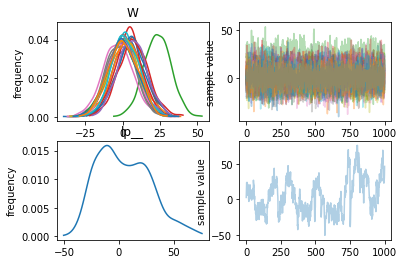

In [29]:
fit.plot(["W","lp__"])
plt.show()

In [22]:
# get mean and standard devitions for predictions
y_hat = samples["y_hat"].mean(axis=0)
y_std = samples["y_hat"].std(axis=0)
rmse = np.sqrt(((y_test - y_hat)**2).sum()/len(y_test))
print(f"RMSE = ", rmse)

RMSE =  5.804383190054946


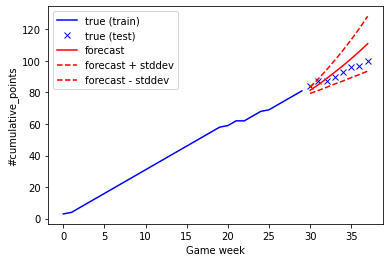

In [23]:
plt.plot(ix_train, y_train, "b-")
plt.plot(ix_test, y_test, "bx")
plt.plot(ix_test, y_hat, "r-")
plt.plot(ix_test, y_hat + y_std, "r--")
plt.plot(ix_test, y_hat - y_std, "r--")
plt.xlabel("Game week")
plt.ylabel(target)
plt.legend(["true (train)","true (test)","forecast","forecast + stddev","forecast - stddev"])

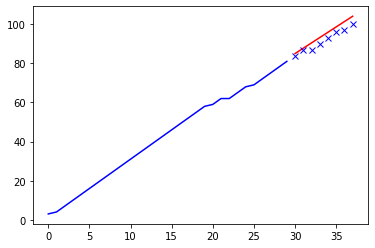

In [24]:
## Baseline model

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(np.arange(30).reshape(-1,1),y_train)
y_pred = lr.predict(np.arange(30,38).reshape(-1,1))
plt.figure()
plt.plot(np.arange(30).reshape(-1,1),y_train, c='b')
plt.plot(np.arange(30,38).reshape(-1,1), y_pred, c='r')
plt.plot(np.arange(30,38).reshape(-1,1), y_test, 'bx')
plt.show()

**Next steps** \\
Add more inputs into the model, especially players inputs (take care to not consider the future, so players datas needs to be recompute before every games). \\
2 different approaches:
* team oriented (predict result of a specific game/the league) 
* player oriented (which player are playing best together, contribution of each player to the outcome of the game ...)